In [ ]:
import pandas as pd
import csv
import numpy as np
%matplotlib inline

from matplotlib import pyplot

import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D



from sklearn.cluster import KMeans
from sklearn import datasets


In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/Users/humrabb/Downloads/basketball.csv')

In [ ]:
data = data.astype(float)
data

,assists_per_Minute_real,heightInteger,time_playedReal,ageInteger,points_per_minuteReal
0,0.0888,201.0,36.02,28.0,0.5885
1,0.1399,198.0,39.32,30.0,0.8291
2,0.0747,198.0,38.80,26.0,0.4974
3,0.0983,191.0,40.71,30.0,0.5772
4,0.1276,196.0,38.40,28.0,0.5703
...,...,...,...,...,...
91,0.1554,183.0,11.58,24.0,0.3195
92,0.2282,185.0,10.08,24.0,0.2381
93,0.1778,185.0,18.56,23.0,0.2802
94,0.1863,185.0,11.81,23.0,0.3810


I decided to plot the original data just to see what it looked like:

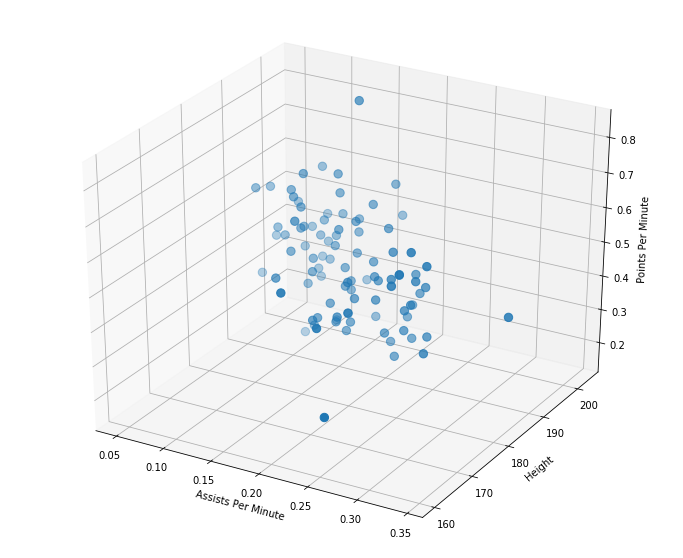

In [ ]:
fig = plt.figure(figsize =(12,10))
ax = plt.axes(projection="3d")

x_feature = data['assists_per_Minute_real']
y_feature = data[' heightInteger']
z_feature = data[' points_per_minuteReal']

ax.set_xlabel('Assists Per Minute')
ax.set_ylabel('Height')
ax.set_zlabel('Points Per Minute')


ax.scatter3D(x_feature, y_feature, z_feature, s = 70);

The data seemed relatively close together, with a few major outliers.

In order to eventually plot the results of the clustering, I chose the three attributes I thought would be the best predictors of position. I chose assists per minute, height, and points per minute. I chose these attributes because I knew that certain positions tend to have taller players (center), while others tend to have shorter players (point guard). Certain positions also tend to have higher scorers, while others have higher assists. Ultimately, this impact the points per game, which can also be a big differentiator between positions. 

In [ ]:
dbdata = data.copy()
dbdata = dbdata.drop([' time_playedReal', ' ageInteger'], axis = 1)

dbdata

,assists_per_Minute_real,heightInteger,points_per_minuteReal
0,0.0888,201.0,0.5885
1,0.1399,198.0,0.8291
2,0.0747,198.0,0.4974
3,0.0983,191.0,0.5772
4,0.1276,196.0,0.5703
...,...,...,...
91,0.1554,183.0,0.3195
92,0.2282,185.0,0.2381
93,0.1778,185.0,0.2802
94,0.1863,185.0,0.3810


# DBScan Clustering

Since I had no ground truth or pre-assigned labels for this data, I decided to use DBScan, which doesn't require a specified amount of clusters. I had to play around with the min_samples to figure out that 10 worked best, and I wrote a for-loop to change the epsilon value so I could see the different numbers of clusters the model came up with. I used epsilon values between 0 and 1, with a few integers beyond 1 just to see how larger values would affect the output.

In [ ]:
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6]

from sklearn.cluster import DBSCAN
import numpy as np

for i in epsilons: 
    db = DBSCAN(eps = i, min_samples = 10)
    db.fit(dbdata)

    model_labels = db.labels_

# Number of clusters in labels, ignoring noise if present. 
    n_clusters_ = len(set(model_labels)) - (1 if -1 in model_labels else 0)
    n_noise_ = list(model_labels).count(-1)

    print("Epsilon: {}".format(i))
    print('Estimated number of clusters: {}'.format(n_clusters_))
    print('Noise: {}'.format(n_noise_))
    print (" ")


Epsilon: 0.1
Estimated number of clusters: 2
Noise: 70
 
Epsilon: 0.2
Estimated number of clusters: 5
Noise: 24
 
Epsilon: 0.3
Estimated number of clusters: 5
Noise: 24
 
Epsilon: 0.4
Estimated number of clusters: 5
Noise: 24
 
Epsilon: 0.5
Estimated number of clusters: 5
Noise: 24
 
Epsilon: 0.6
Estimated number of clusters: 5
Noise: 24
 
Epsilon: 0.7
Estimated number of clusters: 5
Noise: 24
 
Epsilon: 0.8
Estimated number of clusters: 5
Noise: 24
 
Epsilon: 0.9
Estimated number of clusters: 5
Noise: 24
 
Epsilon: 1
Estimated number of clusters: 5
Noise: 24
 
Epsilon: 2
Estimated number of clusters: 5
Noise: 24
 
Epsilon: 3
Estimated number of clusters: 4
Noise: 12
 
Epsilon: 4
Estimated number of clusters: 1
Noise: 4
 
Epsilon: 5
Estimated number of clusters: 1
Noise: 4
 
Epsilon: 6
Estimated number of clusters: 1
Noise: 3
 


Most of the epsilon values caused the model to form 5 clusters, so I decided to just run the model separately with a epsilon of 0.5.

In [ ]:
model = DBSCAN(eps = 0.5, min_samples = 10)
model.fit(dbdata)


labels = model.labels_
labels

num_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
num_noise_ = list(labels).count(-1)

model_labels
    
    
print("Epsilon: {}".format(0.5))
print('Estimated number of clusters: {}'.format(num_clusters_))
print('Noise: {}'.format(num_noise_))

Epsilon: 0.5
Estimated number of clusters: 5
Noise: 24


In [ ]:
model.labels_

array([-1, -1, -1,  0,  1, -1,  2,  0,  3, -1,  4, -1,  3,  0,  0,  2,  1,
       -1,  2,  1,  4,  0,  1, -1,  2, -1,  1,  4, -1, -1,  3,  3,  0,  3,
        2,  3,  1, -1,  2,  1,  3, -1,  2, -1,  0,  4,  0,  2,  3,  3,  0,
       -1,  3,  2,  2, -1,  2,  1,  2, -1,  1,  4,  2,  1,  0,  1,  4,  0,
        4, -1,  0,  1,  4, -1,  0,  0,  4, -1, -1,  3,  3,  2,  2,  3,  4,
        3, -1,  1,  3,  4, -1, -1,  3,  3,  3,  2])

In [ ]:
from collections import Counter
Counter(labels)

Counter({-1: 24, 0: 14, 1: 13, 2: 16, 3: 18, 4: 11})

A lot of the points ended up being labeled as noise. 

# Plotting Clusters

To plot the clusters, I simply plotted the original data, using the index labels to color the clusters.

In [ ]:
dbresults = dbdata.copy()

In [ ]:
dbresults['index'] = labels

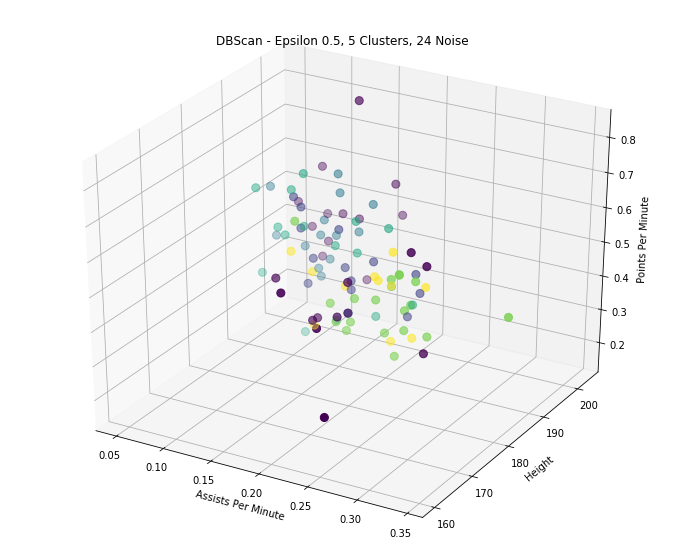

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection="3d")
x = np.array(dbresults['assists_per_Minute_real'])
y = np.array(dbresults[' heightInteger'])
z = np.array(dbresults[' points_per_minuteReal'])

ax.scatter(x,y,z, marker="o", c=dbresults["index"],s=65)
ax.set_xlabel('Assists Per Minute')
ax.set_ylabel('Height')
ax.set_zlabel('Points Per Minute')

plt.title("DBScan - Epsilon 0.5, 5 Clusters, 24 Noise")
plt.show()

# Interpretation/Conclusions


There is a clear connection between performance and height (as expected). 

Hypotheses:
1. The green points are centers. This is because centers tend to score less points and are taller, which generally fits the location of the green points. 
2. The purple points are small forwards - the purple points are spread all around, and small forwards tend to be very versatile.
3. The yellow points are power forwards. Power forwards tend to have high assists but are also versatile, which explains the variance in the yellow points.
4. The blue points are point guards - point guards score a lot of points.
5. The greenish-blue points are shooting guards - they score a lot and are similar to point guards in many ways.


Overall, the model failed to make very distinct clusters. This may be because as the NBA continues to evolve, positions are less defined - centers, for example, are no longer playing the same way they were 20 or 30 years ago. Players are becoming capable of playing multiple positions (The 2015-2016 Warriors would sometimes play Draymond Green in center for their "death lineup". Considering the small size of the dataset, it is also possible that the data didn't even include data from some positions. 

Finally, just to see what the clusters would have looked like with different epsilon values, I used a for loop to plot the clusters with the original epsilon values I used.

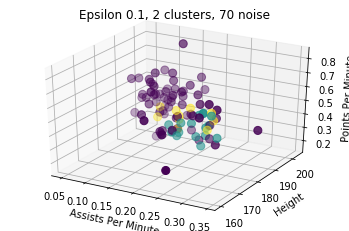

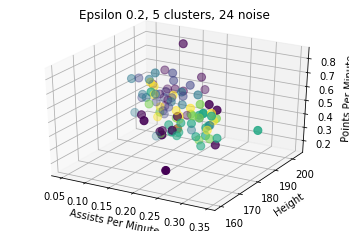

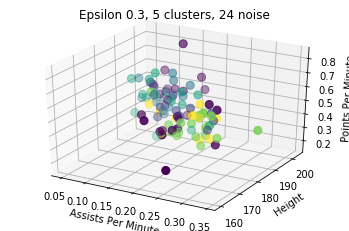

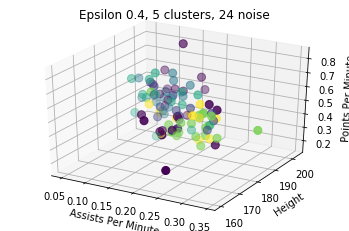

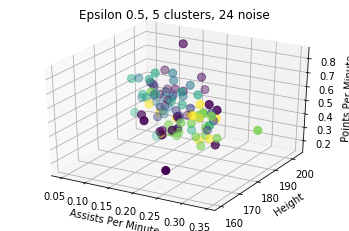

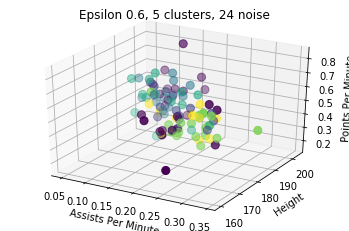

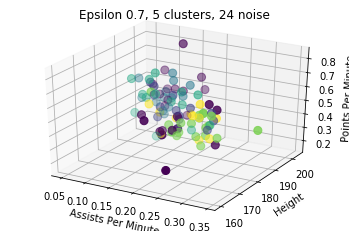

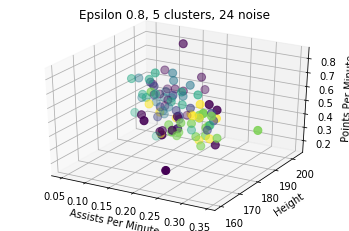

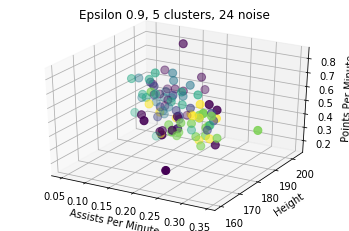

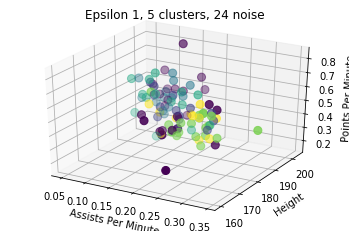

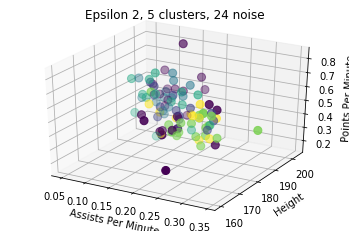

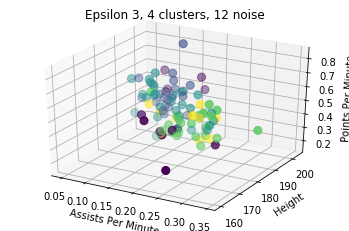

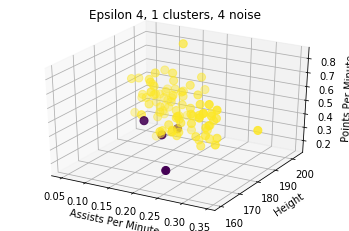

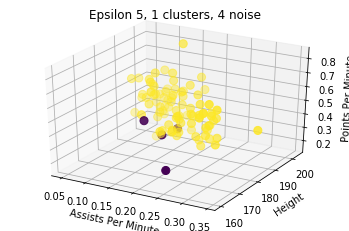

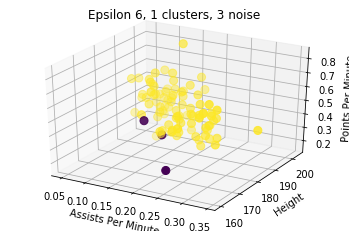

In [ ]:
#looping
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6]

from sklearn.cluster import DBSCAN
import numpy as np

for i in epsilons: 
    db = DBSCAN(eps = i, min_samples = 10)
    db.fit(dbdata)

    model_labels = db.labels_

# Number of clusters in labels, ignoring noise if present. 
    n_clusters_ = len(set(model_labels)) - (1 if -1 in model_labels else 0)
    n_noise_ = list(model_labels).count(-1)

    dbloop = dbdata.copy()
    dbloop['index'] = model_labels
    
    
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    x = np.array(dbloop['assists_per_Minute_real'])
    y = np.array(dbloop[' heightInteger'])
    z = np.array(dbloop[' points_per_minuteReal'])

    ax.scatter(x,y,z, marker="o", c=dbloop["index"],s=65)
    ax.set_xlabel('Assists Per Minute')
    ax.set_ylabel('Height')
    ax.set_zlabel('Points Per Minute')

    plt.title("Epsilon {}, {} clusters, {} noise".format(i, n_clusters_, n_noise_))
              
    